# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [6]:
# Installing the libraries with the specified version.
# !pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [7]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
  f1_score,
  accuracy_score,
  recall_score,
  precision_score,
  confusion_matrix,
  make_scorer,
)



## Loading the dataset

In [8]:
# Mount the drive for Google Coalb
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [9]:
# Read the Loan Modelling csv file
df = pd.read_csv('/content/drive/MyDrive/AIML_UTA/Projects/AIML_LoanCampaign/Loan_Modelling.csv')

## Data Overview

### View the first and last 5 rows of the dataset.


In [10]:
# Returns first 5 rows of the dataframe
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [11]:
# Returns last 5 rows of the dataframe
df.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


### Understand the shape of the dataset.

In [12]:
df.shape #returns dimension of the dataframe

(5000, 14)

### Check the data types of the columns for the dataset.


In [13]:
df.info()  # returns the summary of dataframe including the index dtype and columns, non-null values and memory usage.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Checking for missing values

In [14]:
df.isna().values.any()     # Checks if there is any null value in any column

False

### Statistical summary of the data


In [15]:
df.describe().T  # returns stats for all numerical columns

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### Check for Duplicate Values

In [16]:
# Lets check for any duplicate values , and if there is any we will remove them
df[df.duplicated()].count() # check for any duplicate values

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


### Check for Unique Values

In [17]:
df.nunique() # returns unique values for each column

,0
ID,5000
Age,45
Experience,47
Income,162
ZIPCode,467
Family,4
CCAvg,108
Education,3
Mortgage,347
Personal_Loan,2


### Observations - Data OverView

There are **5000** rows and **14** columns in the given Loan Campaign Dataframe

Datatypes used in this Loan dataset are all numeric
All  columns have no missing (i.e., non-null) values.

13 columns are Integer and only CCAvg is a float quantity

Total 14 Columns which indicate 13 features for 1 target

There are no NULL values and duplicate values

Minimum value for Experince is negative(-3) which is not possible. Needs Treatment

Though ZIPCode is numeric column - it could be categorical here - May need treatment

Total memory used = 547.0 KB




## Checking for Unusual values

In [18]:
df.nunique() # returns unique values for each column

,0
ID,5000
Age,45
Experience,47
Income,162
ZIPCode,467
Family,4
CCAvg,108
Education,3
Mortgage,347
Personal_Loan,2


In [19]:
df["Age"].unique() # returns unique Age of customers

array([25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 59, 67, 60, 38, 42, 46,
       55, 56, 57, 44, 36, 43, 40, 30, 31, 51, 32, 61, 41, 28, 49, 47, 62,
       58, 54, 33, 27, 66, 24, 52, 26, 64, 63, 23])

In [20]:
df["Experience"].unique() # returns unique Experience for customers

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [21]:
df["Income"].unique() # returns unique Income of customers

array([ 49,  34,  11, 100,  45,  29,  72,  22,  81, 180, 105, 114,  40,
       112, 130, 193,  21,  25,  63,  62,  43, 152,  83, 158,  48, 119,
        35,  41,  18,  50, 121,  71, 141,  80,  84,  60, 132, 104,  52,
       194,   8, 131, 190,  44, 139,  93, 188,  39, 125,  32,  20, 115,
        69,  85, 135,  12, 133,  19,  82, 109,  42,  78,  51, 113, 118,
        64, 161,  94,  15,  74,  30,  38,   9,  92,  61,  73,  70, 149,
        98, 128,  31,  58,  54, 124, 163,  24,  79, 134,  23,  13, 138,
       171, 168,  65,  10, 148, 159, 169, 144, 165,  59,  68,  91, 172,
        55, 155,  53,  89,  28,  75, 170, 120,  99, 111,  33, 129, 122,
       150, 195, 110, 101, 191, 140, 153, 173, 174,  90, 179, 145, 200,
       183, 182,  88, 160, 205, 164,  14, 175, 103, 108, 185, 204, 154,
       102, 192, 202, 162, 142,  95, 184, 181, 143, 123, 178, 198, 201,
       203, 189, 151, 199, 224, 218])

In [22]:
df["ZIPCode"].unique() # returns unique Zipcode of customers

array([91107, 90089, 94720, 94112, 91330, 92121, 91711, 93943, 93023,
       94710, 90277, 93106, 94920, 91741, 95054, 95010, 94305, 91604,
       94015, 90095, 91320, 95521, 95064, 90064, 94539, 94104, 94117,
       94801, 94035, 92647, 95814, 94114, 94115, 92672, 94122, 90019,
       95616, 94065, 95014, 91380, 95747, 92373, 92093, 94005, 90245,
       95819, 94022, 90404, 93407, 94523, 90024, 91360, 95670, 95123,
       90045, 91335, 93907, 92007, 94606, 94611, 94901, 92220, 93305,
       95134, 94612, 92507, 91730, 94501, 94303, 94105, 94550, 92612,
       95617, 92374, 94080, 94608, 93555, 93311, 94704, 92717, 92037,
       95136, 94542, 94143, 91775, 92703, 92354, 92024, 92831, 92833,
       94304, 90057, 92130, 91301, 92096, 92646, 92182, 92131, 93720,
       90840, 95035, 93010, 94928, 95831, 91770, 90007, 94102, 91423,
       93955, 94107, 92834, 93117, 94551, 94596, 94025, 94545, 95053,
       90036, 91125, 95120, 94706, 95827, 90503, 90250, 95817, 95503,
       93111, 94132,

In [23]:
len(df["ZIPCode"].unique()) # returns total length for Zipcodes (unique)

467

In [24]:
df["Family"].unique() # returns unique Family of customers

array([4, 3, 1, 2])

In [25]:
df["CCAvg"].unique() # returns unique Credit Card Average spend for all customers

array([ 1.6 ,  1.5 ,  1.  ,  2.7 ,  0.4 ,  0.3 ,  0.6 ,  8.9 ,  2.4 ,
        0.1 ,  3.8 ,  2.5 ,  2.  ,  4.7 ,  8.1 ,  0.5 ,  0.9 ,  1.2 ,
        0.7 ,  3.9 ,  0.2 ,  2.2 ,  3.3 ,  1.8 ,  2.9 ,  1.4 ,  5.  ,
        2.3 ,  1.1 ,  5.7 ,  4.5 ,  2.1 ,  8.  ,  1.7 ,  0.  ,  2.8 ,
        3.5 ,  4.  ,  2.6 ,  1.3 ,  5.6 ,  5.2 ,  3.  ,  4.6 ,  3.6 ,
        7.2 ,  1.75,  7.4 ,  2.67,  7.5 ,  6.5 ,  7.8 ,  7.9 ,  4.1 ,
        1.9 ,  4.3 ,  6.8 ,  5.1 ,  3.1 ,  0.8 ,  3.7 ,  6.2 ,  0.75,
        2.33,  4.9 ,  0.67,  3.2 ,  5.5 ,  6.9 ,  4.33,  7.3 ,  4.2 ,
        4.4 ,  6.1 ,  6.33,  6.6 ,  5.3 ,  3.4 ,  7.  ,  6.3 ,  8.3 ,
        6.  ,  1.67,  8.6 ,  7.6 ,  6.4 , 10.  ,  5.9 ,  5.4 ,  8.8 ,
        1.33,  9.  ,  6.7 ,  4.25,  6.67,  5.8 ,  4.8 ,  3.25,  5.67,
        8.5 ,  4.75,  4.67,  3.67,  8.2 ,  3.33,  5.33,  9.3 ,  2.75])

In [26]:
df["Education"].unique() # returns unique Education of customers

array([1, 2, 3])

In [27]:
df["Mortgage"].unique() # returns unique Mortgage of customers

array([  0, 155, 104, 134, 111, 260, 163, 159,  97, 122, 193, 198, 285,
       412, 153, 211, 207, 240, 455, 112, 336, 132, 118, 174, 126, 236,
       166, 136, 309, 103, 366, 101, 251, 276, 161, 149, 188, 116, 135,
       244, 164,  81, 315, 140,  95,  89,  90, 105, 100, 282, 209, 249,
        91,  98, 145, 150, 169, 280,  99,  78, 264, 113, 117, 325, 121,
       138,  77, 158, 109, 131, 391,  88, 129, 196, 617, 123, 167, 190,
       248,  82, 402, 360, 392, 185, 419, 270, 148, 466, 175, 147, 220,
       133, 182, 290, 125, 124, 224, 141, 119, 139, 115, 458, 172, 156,
       547, 470, 304, 221, 108, 179, 271, 378, 176,  76, 314,  87, 203,
       180, 230, 137, 152, 485, 300, 272, 144,  94, 208, 275,  83, 218,
       327, 322, 205, 227, 239,  85, 160, 364, 449,  75, 107,  92, 187,
       355, 106, 587, 214, 307, 263, 310, 127, 252, 170, 265, 177, 305,
       372,  79, 301, 232, 289, 212, 250,  84, 130, 303, 256, 259, 204,
       524, 157, 231, 287, 247, 333, 229, 357, 361, 294,  86, 32

In [28]:
# returns uniue negative experiences
df[df["Experience"] < 0]["Experience"].unique()

array([-1, -2, -3])

In [29]:
# Returns total count of unique negative experiences
df[df["Experience"] < 0]["Experience"].value_counts()

,count
Experience,
-1,33
-2,15
-3,4


In [30]:
# Correcting the experience values - making them to absolute number assuming its is a data entry error
df["Experience"].replace(-1, 1, inplace=True)
df["Experience"].replace(-2, 2, inplace=True)
df["Experience"].replace(-3, 3, inplace=True)

<ipython-input-30-b75df360fbfe>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Experience"].replace(-1, 1, inplace=True)
<ipython-input-30-b75df360fbfe>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [31]:
df.describe().T # Returns Statistical Summary after Experience column is fixed.

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


###Observations

Customers are in range 23 - 67 Years old

Max Experience is 43 Years with mean and median is 20 years

Minimum Income is 8K and max income is 224K. Mean is 73K ans median is 64K. We may see some outliers for the Salary

There are 52 rows in total where Experience in Ages is less than 0,

Max mortgage taken is 635K wheras median is 0 - shows outlier here

Average customer spends 0k to 10K on credit card where mean is little less than 2K (1.93) and median of 1.5K

There are total 467 unique Zip Codes

Outliers are expected for Income, Mortgage and CCAvg (May/May not - need tratment)

Negative Experiences are mostly for the 23 - 29 age group people

Looks like all negative experiences are data entry error

All negative experiences are replaced by its absolute values assuming its a data entry error


## Sanity Checks







In [32]:
# Returns percentage of customers who has CD Account
round((df[df['CD_Account'] == 1]['ID'].count()/df['ID'].nunique()) *100,2)

6.04

In [33]:
# Returns percentage of customers who has Credit Card
round((df[df['CreditCard'] == 1]['ID'].count()/df['ID'].nunique()) *100,2)

29.4

In [34]:
# Returns percentage of customers who uses Internet banking facilities
round((df[df['Online'] == 1]['ID'].count()/df['ID'].nunique()) *100,2)

59.68

In [35]:
# Returns percentage of customers who has Securities Account with the bank
round((df[df['Securities_Account'] == 1]['ID'].count()/df['ID'].nunique()) *100,2)

10.44

In [36]:
# Returns percentage of customers who accepts personal loan
round((df[df['Personal_Loan'] == 1]['ID'].count()/df['ID'].nunique()) *100,2)

9.6

In [37]:
# Returns percentage of customers who has mortgage
round((df[df['Personal_Loan'] == 1]['ID'].count()/df['ID'].nunique()) *100,2)

9.6

In [38]:
# Returns count of family memebers
df.groupby('Family')['ID'].count()

,ID
Family,
1,1472
2,1296
3,1010
4,1222


In [39]:
# Returns education count
df.groupby('Education')['ID'].count()

,ID
Education,
1,2096
2,1403
3,1501


In [40]:
# Returns Percent of customers who spent less than 5K
round((df[df['CCAvg'] < 5]['ID'].count()/df['ID'].nunique()) *100,2)

92.72

### Observations

Only 6.04 percent customers have the CD Account

Only 29.4 percent customers use credit cards issued by other banls

Approx 60 percent customers use online banking facitlities

Only 9.6 percent customers have borrowed loan after the Campaign

 Only 10.44 percent customers have the Securities Account

more than 90% customers spend less than 5K


## Exploratory Data Analysis. ToDo

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

In [41]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [42]:
# function to create labeled barplots


def labeled_barplot(data, feature, hue, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        hue = hue,
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univariate Data Analysis.

#### Age

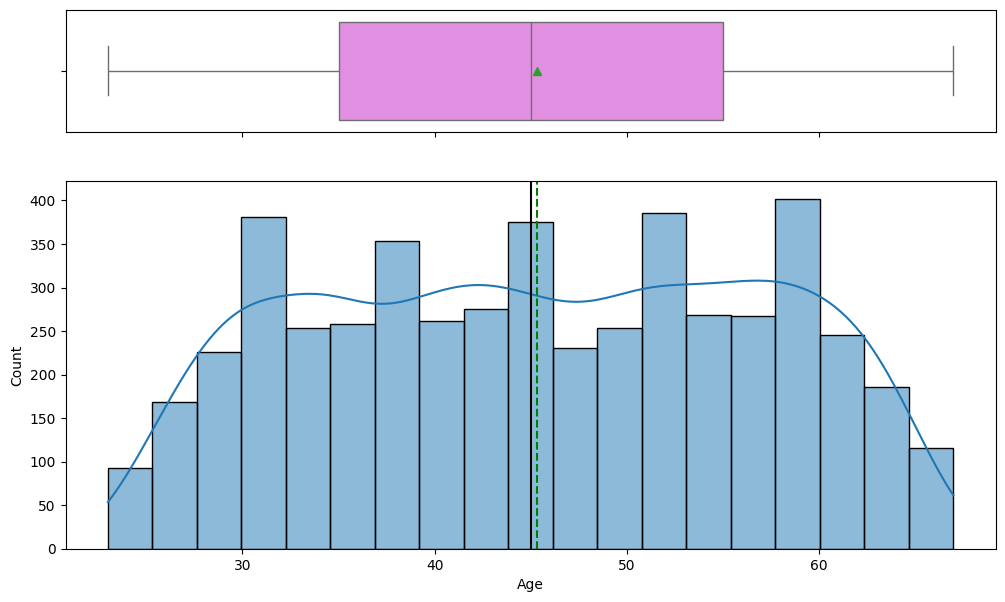

In [43]:
# calls function to plot a boxplot and a histogram along the same scale for Age
histogram_boxplot(df, "Age", kde=True)

##### Observation
Age is well distributed in the dataset but has 5 spikes

Minimum is 23 amd Max is 67

Mean and Median being 45


#### Experience

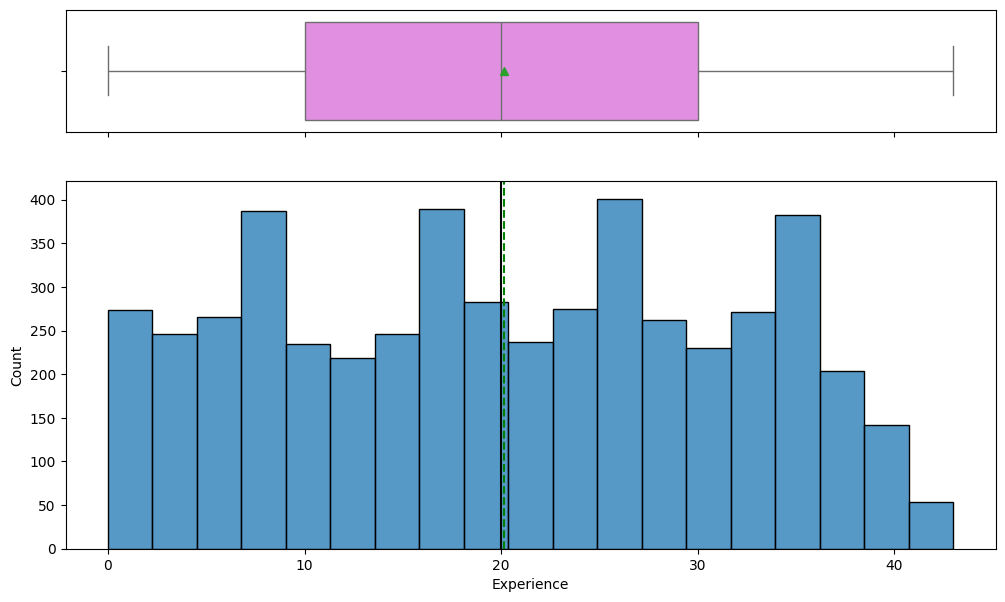

In [44]:
# calls function to plot a boxplot and a histogram along the same scale for Experience
histogram_boxplot(df, "Experience")


##### Observations

Experience is well distributed with 4 spikes

Minimum Experience is 0 years wheras Max experience is 43 years

Mean and Median - both close to 20

#### Income

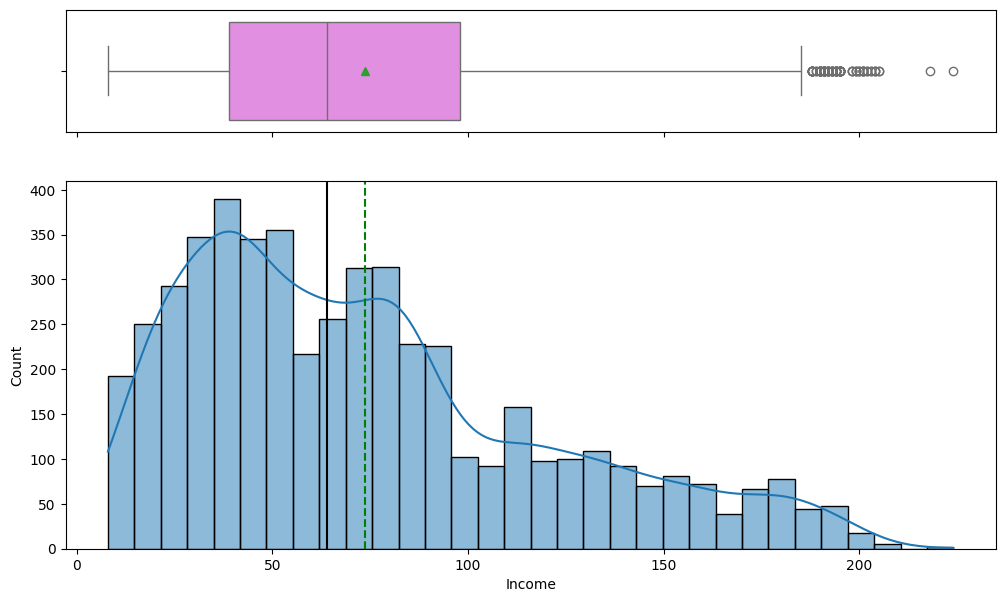

In [45]:
# calls function to plot a boxplot and a histogram along the same scale for Income
histogram_boxplot(df, "Income", kde = True)


In [46]:
# returns percent of customers which have income less than 100K

df[df['Income'] < 100]['ID'].count()/df['ID'].count()

0.7556

##### Observations

Income is heavily right Skewed. There are more customers with low income.

75 percent of customers have income less than 100K

Income ranges from 8K to 224K

Max Income(224K) is much higher than Q3 (98K)

Mean is 73K wheras Median is 64K (Median < Mean)

We see Ouliers for the Income

####CCAvg

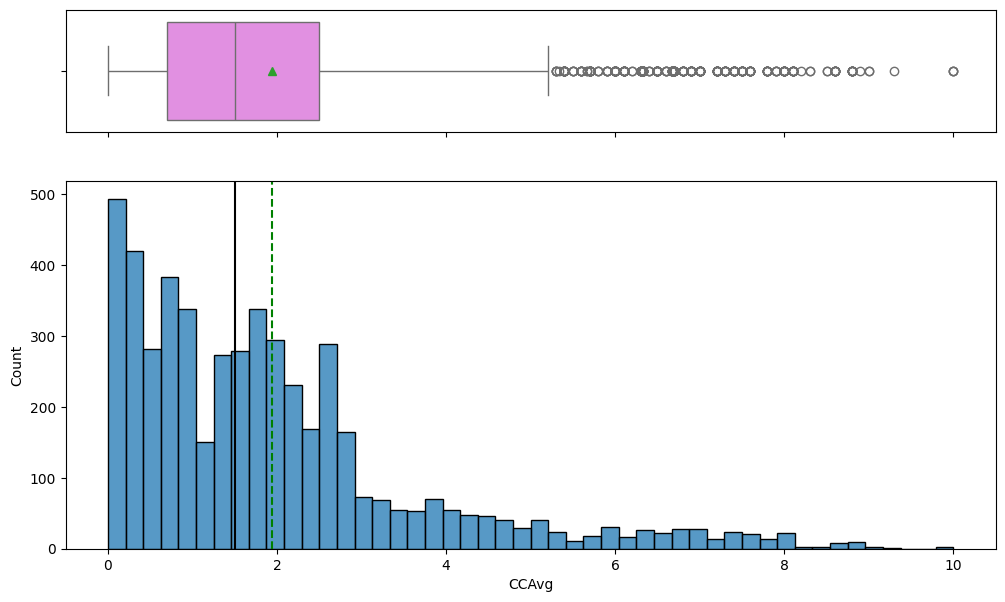

In [47]:
# calls function to plot a boxplot and a histogram along the same scale for Credit Card Spend Average
histogram_boxplot(df, "CCAvg")

In [48]:
round((df[df['CCAvg'] > 5]['ID'].count()/df['ID'].nunique()) *100,2)

6.92

In [49]:
round((df[df['CCAvg'] <=2  ]['ID'].count()/df['ID'].nunique()) *100,2)

64.94

##### Observations

CCAvg is heavily right Skewed. 50 percent cusomers spend less than 2K on credit card

Range of CCAvg vries from 0 to 10K
Income ranges from 8K to 224K

Max CCAvg(10K) is much higher than Q3 (2.5K)

Less than 65 percent of customers spends 2K or less per month

less than 7 percent of customers spend more than 5000 dollars per month

Mean is 1.93K wheras Median is 1.5K

Lot of outliers in CCAvg on higher side

#### Mortgage



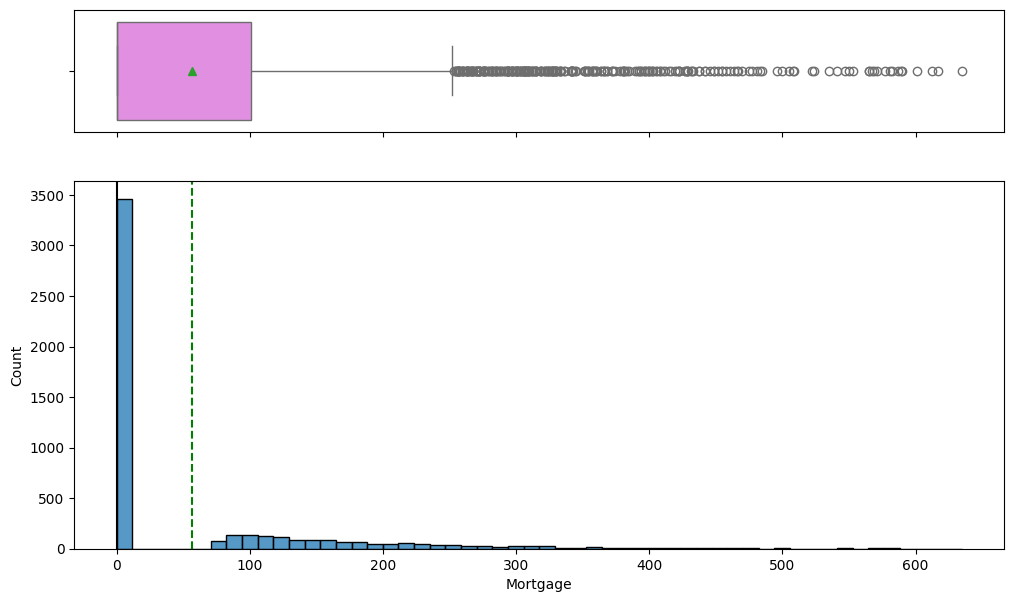

In [50]:
# calls function to plot a boxplot and a histogram along the same scale for Mortgage
histogram_boxplot(df, "Mortgage")

Mortgage  is heavily right Skewed. 50 percent cusomers spend less than 2K on credit card

Range of Mortgage vries from 0 to 635K

Max mortgage(635K) is much higher than Q3 (101K)

 Median is 0K

Lot of outliers in mortgage on higher side

#### Education

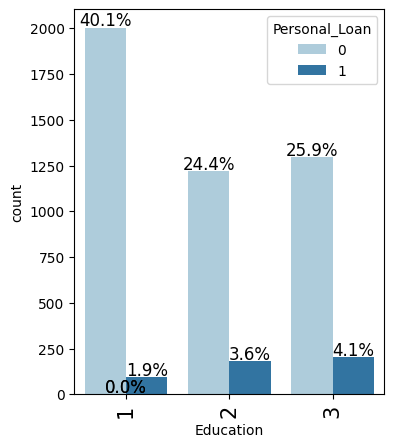

In [51]:
# categorical plot for education
labeled_barplot(df, "Education", "Personal_Loan", perc=True)

Approx 40% customers are undergrads whereas Grads are little less than Advanced Professionals

Personal loan is more with Graduates and Advanced Professional

#### Family

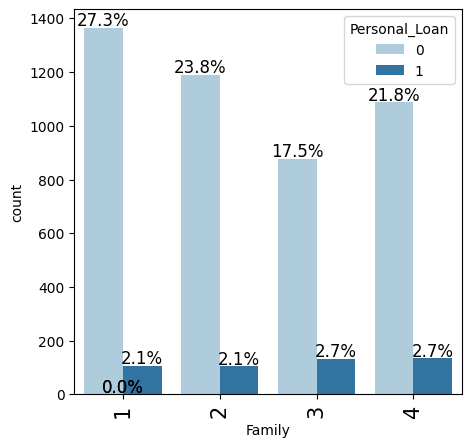

In [52]:
# categorical plot for Family
labeled_barplot(df, "Family", "Personal_Loan", perc=True)

Customers with Family size of 3 and 4 is more common for personal loan

#### Credit Card

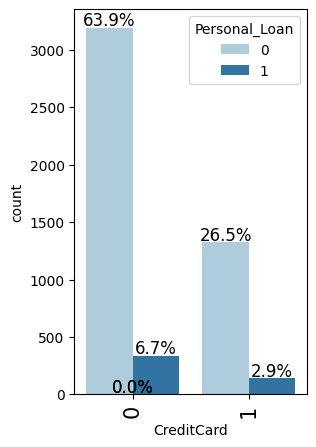

In [53]:
# categorical plot for CreditCard
labeled_barplot(df, "CreditCard", "Personal_Loan", perc=True)

64% customers do not have credit cards from other bank

#### Online

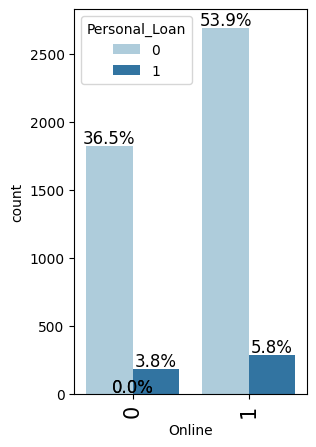

In [54]:
# categorical plot for Online
labeled_barplot(df, "Online", "Personal_Loan", perc=True)

53.9% customers have Online banking enabled


#### Personal Loan

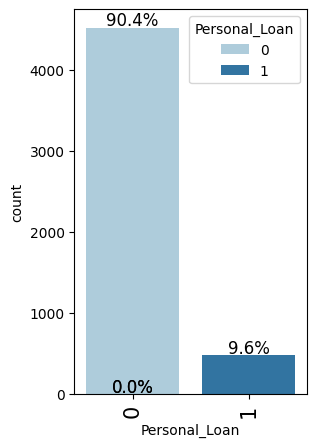

In [55]:
# categorical plot for Personal_Loan
labeled_barplot(df, "Personal_Loan", "Personal_Loan", perc=True)

Very few customers accepted the personal loan in the campaign

Only 9.6% customer have the personal loan


#### Securities Account

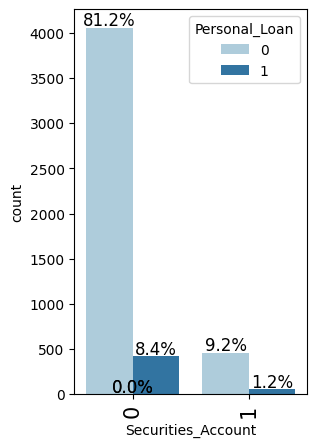

In [56]:
# categorical plot for Securities Account
labeled_barplot(df, "Securities_Account", "Personal_Loan", perc=True)

Most of the customers do not have securities account
Approx little over 500 customers hold the Securities account in the bank

81.2% customers do not have Security Account


#### CD

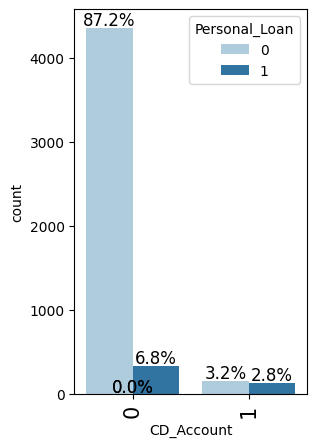

In [57]:
# categorical plot for CD_account
labeled_barplot(df, "CD_Account", "Personal_Loan", perc=True)

#### Observations

87.2% customers do not have Certified Deposits




### BiVariate Analysis



In [58]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 3, 3))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [59]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(8, 6))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0])
    #sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
    )

    plt.tight_layout()
    plt.show()

#### Corelation check

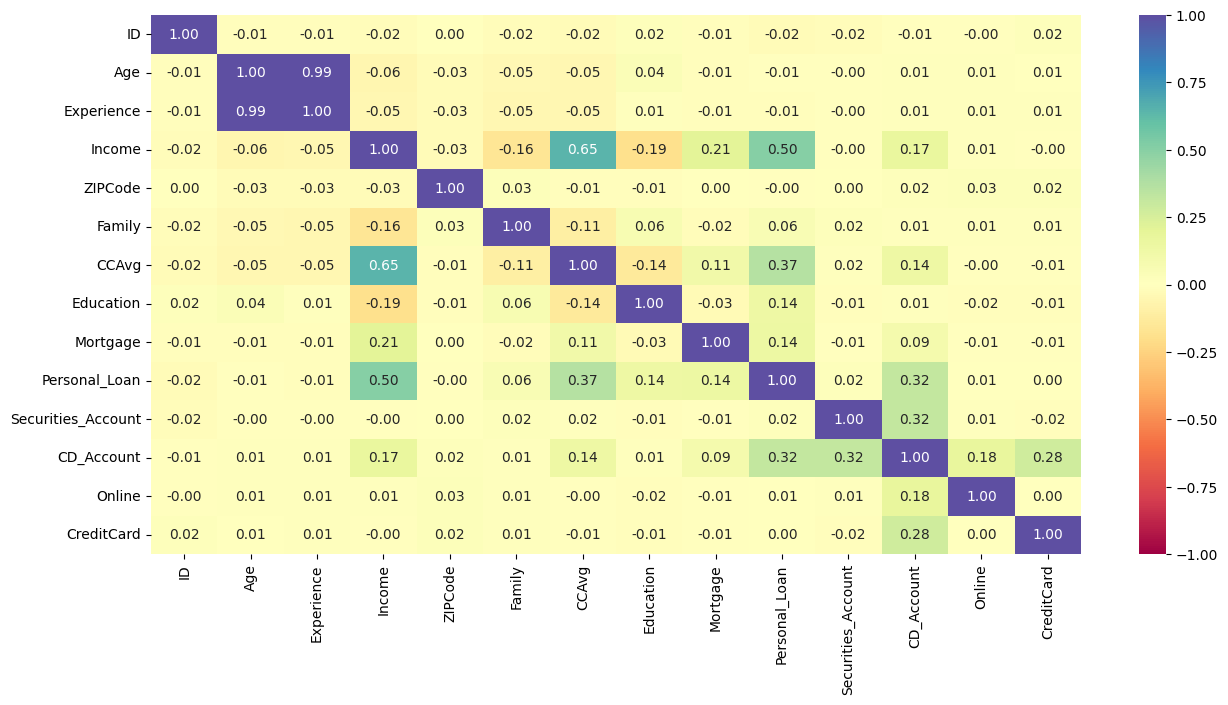

In [60]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral") #Returns the heatmap of the data
plt.show()

In [ ]:
sns.pairplot(data=df, hue='Personal_Loan', corner=True);


##### Observations

Age and Experience are highly corelated and hence experience column can be dropped.

Customers who have more income has more credit card avg

Customers who have more income are more likely to borrow personal loan


#### Personal Loan

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


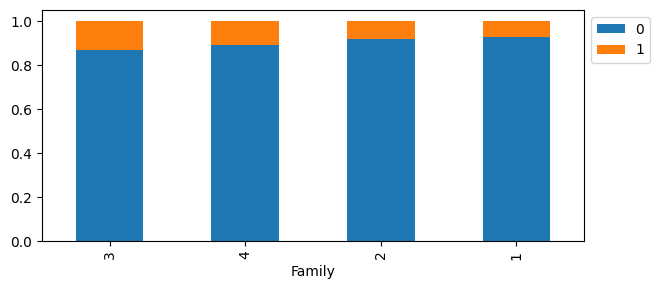

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


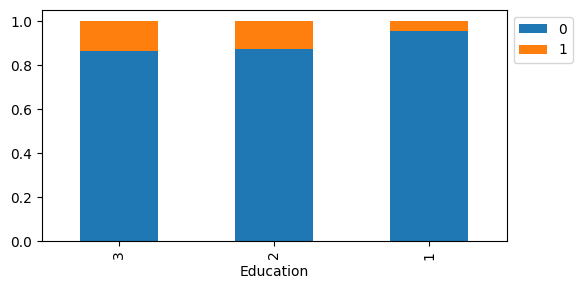

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


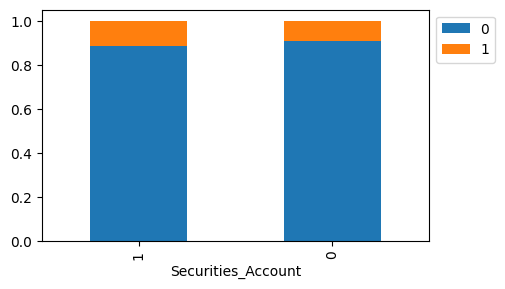

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


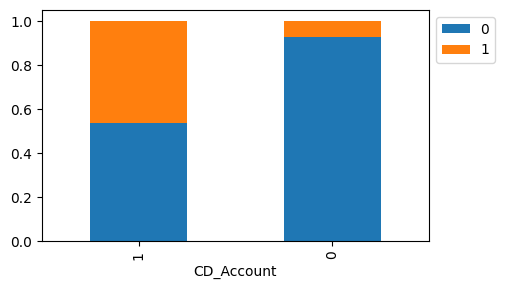

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


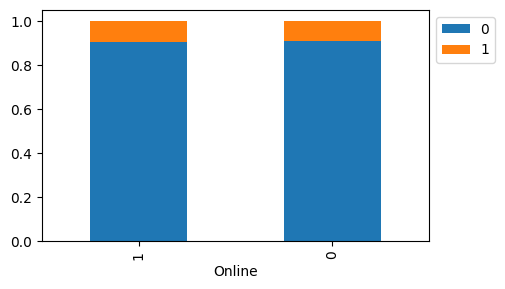

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


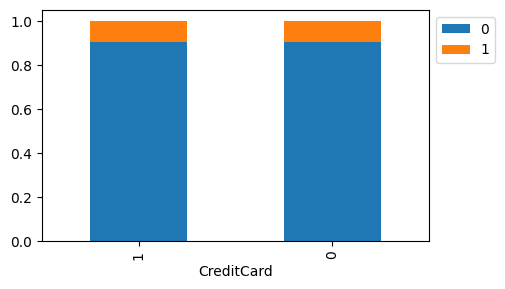

In [ ]:
# calls stacked bar plot function for different categorical parameters wrt Personal loan
stacked_barplot(df, "Family", "Personal_Loan")
stacked_barplot(df, "Education", "Personal_Loan")
stacked_barplot(df, "Securities_Account", "Personal_Loan")
stacked_barplot(df, "CD_Account", "Personal_Loan")
stacked_barplot(df, "Online", "Personal_Loan")
stacked_barplot(df, "CreditCard", "Personal_Loan")



In [ ]:
# calls distribution plot function for different parameters wrt Personal loan

distribution_plot_wrt_target(df, "Age", "Personal_Loan")
distribution_plot_wrt_target(df, "Experience", "Personal_Loan")
distribution_plot_wrt_target(df, "Income", "Personal_Loan")
distribution_plot_wrt_target(df, "ZIPCode", "Personal_Loan")
distribution_plot_wrt_target(df, "CCAvg", "Personal_Loan")
distribution_plot_wrt_target(df, "Mortgage", "Personal_Loan")

In [ ]:
sns.stripplot(data=df, x='Education', y='Income', hue='Personal_Loan');

In [ ]:
sns.stripplot(data=df, x='Age', y='Mortgage', hue='Personal_Loan')

##### Observations

Customers with family size of 3-4 has taken personal loan than family size of 1 or 2

Cusomers with more Advanced/Professional or Graduate  are little more likelier to take the loan than UnderGrads

Customers having higher  income are more likeler to take personal loan

Majority customers who have high income (100K and above) have borrowed personal loans

Customers have no patterns with Personal loan vs age and experience

Customers with higher mortgage are more likelier to take personal loan

Customers with higher expenditure (CCAvg) are more likelier to take personal loan

Approx 30 percent customers with CD Accounts have borrowed personal loan

Approx 87% customers do not own CD Account (4358/5000) and have not borrowed personal loan

Customers who use online/internet banking faciliites have no impact on Personal loan

Customers who did have personal loan is less liklier to use credit cards from other banks



In [ ]:
sns.boxplot(data=df,y='Income',x='Education',hue='Personal_Loan');


In [ ]:
sns.boxplot(data=df,y='Income',x='Family',hue='Personal_Loan');


In [ ]:
sns.boxplot(data=df,y='Mortgage',x='Family',hue='Personal_Loan');


In [ ]:
sns.boxplot(data=df,y='CCAvg',x='CreditCard',hue='Personal_Loan');


##### Observations

 // todo preeti

 As Education level increases, Mean Income also increases.
Customers with Education Graduate and Advanced level who have personal loans have a much higher mean income than Education level Undergraduate customers

Income level among all Family groups is significantly higher for customers who have a Personal Loan.


There are several outliers in Family size 1 and 2 for customers who don't have a Personal loan compared to the rest.
We also see that as Family size increases, the Mortgage value also rises and the customers have Personal Loans


Customers who have Personal loans have a higher credit card Average.
There are several outliers in customers who don't have personal loans.


Customer Profile
Customers with higher Income, higher Mortgage, and higher Credit Card expenditure tend to borrow Personal Loan
Customers with low Income, low Mortgage, and low Credit Card expenditure tend to not borrow Personal Loan at all
Customers with medium Income, medium Mortgage, and medium Credit Card expenditure have a mixed tendency of borrowing (or not borrowing) Personal Loan
These three features are helpful to categorize customers in High, Mid and Low profile



Observations on Patterns
People having higher income have taken personal loan
People with 2 - 4 family members are likelier to take personal loan
People with high mortgages opted for loan.
People with higher credit card average opted for personal loan
People with higher mortgage opted for personal loan
Number of Customers with Advanced/Professional education level has borrowed personal loan more than Graduated and Under-grads
Number of Customers with Family Size 3 or More has borrowed personal loan more than other people
60 of those who had Personal loan with the bank also had Securities Account.
Almost 50% of customers having Certified Deposit, had borrowed Personal Loan.
However, 4358 customers out of 5000, do not have Certified Deposit Account and did not borrow Personal Loan, which means if a customer does not have a CD Account, is likely not to take Personal Loan
Majority customers who did have Personal Loan with the bank did not use Credit Card from other banks.
Customers from San Francisco Bay Area and Los Angeles Region mostly took Personal Loan.
Age and Experience are highly correlated
Majority customers who did have Personal Loan with the bank, are Middle Aged (35 - 55 Years)
Majority customers who did have Personal Loan with the bank, are having High Income (98K - 224k USD)
Important features for determining if a customer would borrow Personal Loan or not, are
Income
Family Size
Education
CD Account
Region



Dependent variable is the Personal_loan which is of categorical data type
Age, Experience, Income, Mortage, CCavg are of integer/float type while other variables are of categorical type
There were no missing values in the dataset
There is no data duplication
The dataset contained 467 unique Zip Codes, which we mapped to 40 counties and then to 10 regions


Outliers
Income, CC Avg, Mortgage columns have right skewed data, with higher outliers, which must be treated

Columns to be dropped¶
Experience, Age Bin, CC Avg Bin, Income Bin, Zip Code, County columns need to be dropped before starting with model building


## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [ ]:
dfcopy= df.copy() # create a copy of data in case we need to restore
dfcopy.info() # Test if copy is all good

### Drop Data Columns

In [ ]:
# Dropping ID, Experience
# Dropping Experience as Age and Experience are highly corelated
# ID is a unique identifier not dependent on personal Loan
dfcopy.drop(['Experience','ID'], axis=1,inplace=True)
# Dropiing Zipcode as it doesnt provide much insight information
dfcopy.drop(['ZIPCode'], axis=1,inplace=True)

In [ ]:
dfcopy.describe()

### Outlier Detection

In [ ]:
# outlier detection using boxplot

numeric_columns = dfcopy.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()


In [ ]:
def Outliers_treatment(data, column): # Todo if needed

  Q1 = data[column].quantile(0.25)  # To find the 25th percentile and 75th percentile.
  Q3 = data[column].quantile(0.75)

  IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

  lower = ( Q1 - 1.5 * IQR )  # Finding lower and upper bounds for all values.
  upper = ( Q3 + 1.5 * IQR )  # All values outside these bounds are outliers



#### Observations

* There are quite a few outliers in the data mainly in Income , Mortgage and CCavg
* However, we will not treat them as they are proper values

In [ ]:
(
    (df.select_dtypes(include=["float64", "int64"]) < Q1 - 1.5 * IQR)
    | (df.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(df) * 100

## Data Preparation for Modeling

In [ ]:
# Create dummy variables
# Use one Hot Encoding for columns where value is 0 and 1 and for Family and Education
dummy_data = pd.get_dummies(dfcopy, columns=["Education", 'Securities_Account','CD_Account','Online' , 'CreditCard','Family'], drop_first=True)
dummy_data.head()

In [ ]:
# We will split the dataset into dependent and independent variable sets
X = dummy_data.drop(["Personal_Loan"], axis=1)
Y = dummy_data["Personal_Loan"]

In [ ]:
X.info()

In [ ]:
Y.info()

In [ ]:

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True)*100)
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True)*100)

#### Obervations

We have split the dataset into Training and Testing dataset.

In both datasets, the target variable has around 90:10 distribution for the values 0 and 1 respectively.

## Model Building

### Model Evaluation Criterion


***Case Predictions:***

**Case 1**  - Predicting a Customer will buy a loan but in reality he actually doesn't buy loan - Loss of Resource (FP)

**Case 2** - Predicting a Customer will not buy a loan but he in reality customer does buy a loan - Loss of Opportunity (FN)

**Which case is more important**

The purpose of Loan Campaign is to bring more customers. If a customer is missed by sales team is an important criteria here so **Case 2** is more important

**How to reduce this loss of Oppurtinity or False Negative(FN)**

The company would want the recall to be maximized, greater the recall score higher are the chances of minimizing the False Negatives.


In [ ]:
## Function to calculate Recall score
def get_recall_score(model,predictors,target):
  """
  Function to compute Recall Score

  model: classifier
  predictors: independent variables
  target: dependent variable
  """
  prediction = model.predict(predictors)
  return recall_score(target,predictors)

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Default Decision Tree

Build Decision Tree Model

Build tree using DecisionTreeClassifier function without class weights

In [ ]:
# Build a default Decision Tree
model = DecisionTreeClassifier(criterion = 'gini', random_state=1)
model.fit(X_train, y_train)

In [ ]:
# Build Confusion matrix for train and test model without weights
confusion_matrix_sklearn(model, X_train, y_train)
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
decision_tree_perf_train_without = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train_without

In [ ]:
decision_tree_perf_test_without = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test_without

#### Visualizing the Default Decision Tree

In [ ]:
feature_names = list(X_train.columns)
print(feature_names)

In [ ]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="green", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations

Model is able to perfectly classify all the data points on the training data set

No errors on the training dataset, each sample is classified correctly resumting in 100$ recall score and precision score

As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.

This generally leads to overfitting of the model as Decision tree will perform best on training set.

Recall score on the Default decision tree performed 89% on recall score its a small disparity in test set

As per default model without class weights - Income is the most important feature, followed by Education and Family

### Build Decision tree with Class weights


In [ ]:
# Build a default Decision Tree
weightmodel = DecisionTreeClassifier(criterion = 'gini', class_weight = {0:90,1:10}, random_state=1)
weightmodel.fit(X_train, y_train)

In [ ]:
confusion_matrix_sklearn(weightmodel, X_train, y_train)
confusion_matrix_sklearn(weightmodel, X_test, y_test)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    weightmodel, X_train, y_train
)
decision_tree_perf_train

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(
    weightmodel, X_test, y_test
)
decision_tree_perf_test

 #### Visualizing the Default Decision Tree with Weights

*   List item
*   List item



In [ ]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    weightmodel,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(weightmodel, feature_names=feature_names, show_weights=True))

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        weightmodel.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

In [ ]:
importances = weightmodel.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="green", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations

As per default model with weights Education is the most important feature, followed by Family and Income

It is a very complex tree, and appears to be over-fitting, recall score on train set is 100%, and on test is 87%


### Decision Tree - Prepruning with Max Depth 6

Limiting the max depth to 6 and making tree more simpler

In [ ]:
limitmodel = DecisionTreeClassifier(criterion = 'gini',max_depth=6,random_state=1, class_weight={0:0.90, 1:0.10})
limitmodel.fit(X_train, y_train)


In [ ]:
confusion_matrix_sklearn(limitmodel, X_train, y_train)
confusion_matrix_sklearn(limitmodel, X_test, y_test)


In [ ]:
# Checking Performance on Train set
decision_tree_limit_perf_train = model_performance_classification_sklearn(limitmodel, X_train, y_train)
decision_tree_limit_perf_train

In [ ]:
# Checking Performance on Test set
decision_tree_limit_perf_test = model_performance_classification_sklearn(limitmodel, X_test, y_test)
decision_tree_limit_perf_test

 #### Visualizing the Default Decision Tree with Weights


In [ ]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    limitmodel,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
print(tree.export_text(limitmodel, feature_names=feature_names, show_weights=True))

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        limitmodel.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

In [ ]:
importances = limitmodel.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations

Todo


### Decision tree - (Pre pruning)


Using GridSearch for hyperpaprameter tuning of our tree model

Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.



In [ ]:
# Choose the type of classifier.
premodel = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(1, 11),
    "min_samples_leaf": [1, 2, 5, 7, 10, 15, 20],
    "max_leaf_nodes": [5, 10, 15, 20, 25, 30],
    "min_impurity_decrease": [0.0001,0.001,0.01,0.1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(premodel, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
premodel = grid_obj.best_estimator_

# Fit the best algorithm to the data.
premodel.fit(X_train,y_train) ## Complete the code to fit model on train data

In [ ]:
confusion_matrix_sklearn(premodel, X_train, y_train)
confusion_matrix_sklearn(premodel, X_test, y_test)


In [ ]:
# Checking Performance on Train set
decision_tree_pre_perf_train = model_performance_classification_sklearn(premodel, X_train, y_train)
decision_tree_pre_perf_train

In [ ]:
# Checking Performance on Test set
decision_tree_pre_perf_test = model_performance_classification_sklearn(premodel, X_test, y_test)
decision_tree_pre_perf_test

 #### Visualizing the Pre Prune Tree


In [ ]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    premodel,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
print(tree.export_text(premodel, feature_names=feature_names, show_weights=True))

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        premodel.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

In [ ]:
importances = premodel.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations

In Pretuned Decision tree Income is the most important feature followed by Education and Family

It is a much simpler Decision Tree with better recall
 of (88%), and no over-fitting


### Cost Complexity / Post Pruning

he DecisionTreeClassifier provides parameters such as min_samples_leaf and max_depth to prevent a tree from overfiting. Cost complexity pruning provides another option to control the size of a tree. In DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned.

In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight= {0:0.90,1:0.10})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path).T

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Train the decision tree using the effective alphas

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha, class_weight={0:0.90,1:0.10})
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(16,12))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
recall_train = []
for clf in clfs:
  pred_train = clf.predict(X_train)
  values_train = recall_score(y_train,pred_train)
  recall_train.append(values_train)

In [ ]:
recall_test = []
for clf in clfs:
  pred_test = clf.predict(X_test)
  values_test = recall_score(y_test,pred_test)
  recall_test.append(values_test)

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)
confusion_matrix_sklearn(best_model, X_test, y_test)

In [ ]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

In [ ]:
decision_tree_post_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_perf_test

#### Visualizing the Post Prune tree

In [ ]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
best_model.get_depth()

In [ ]:
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))


In [ ]:
importances = premodel.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations

Income is most important fearture followed by education and family

### Model Performance Improvement

## Model Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_without.T,
        decision_tree_perf_train.T,
        decision_tree_limit_perf_train.T,
        decision_tree_pre_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning with Limit)",
    "Decision Tree (Pre-Pruning with GridSearch)",
    "Decision Tree (Post-Pruning)",
]

print("Training performance comparison:")
models_train_comp_df

In [ ]:
# testing performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test_without.T,
        decision_tree_perf_test.T,
        decision_tree_limit_perf_test.T,
        decision_tree_pre_perf_test.T,
        decision_tree_post_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning with Limit)",
    "Decision Tree (Pre-Pruning with GridSearch)",
    "Decision Tree (Post-Pruning)",
]

print("Training performance comparison:")
models_train_comp_df

### Observations

todo
* Decision tree models with pre-pruning and post-pruning both are giving equally high recall scores on both training and test sets.
* However, we will choose the post pruned tree as the best model since it is giving a slightly high precision score on the train and test sets than the pre-pruned tree.

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

The goal of sales team should be to minimize Loss of Oppurtinity i.e minimal chance of predicting customer will not purchase a loan but in reality customer do buy the loan.

Marketing team should look at most imprtant features which are Income, CCAvg, followed by Family and Education in predicting whether customer will buy a loan or not

We tried Decision Tree model with prepruning and Post Pruning. Post Pruning Decison Tree gave todo % recall and todo% accuracy wheras Pre pruning Decison Tree gave todo % recall and todo% accuracy

Also Decision tree model is easy to use

Customers with High Income have high Expenditures whereas Customers with low income have low expenses



Sales /Marketing team should run schemes/advertisements for high income customers to attract more customers to take personal loan






___